# ANÁLISIS UNIVARIANTE



## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import pi
from ydata_profiling import ProfileReport

## Cargar dataset


In [2]:
ruta = '../data/calidad_aire_clean.csv'
df = pd.read_csv(ruta, sep=',')
# df = pd.read_csv(ruta, sep=',', encoding="utf-8", skipinitialspace=True,
#                 index_col='FECHA', parse_dates=True)
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 00:00:00,2019.0,1.0,1.0,0,Martes,8.0,13.0,0.7,79.0,...,32.0,3.84,6.4,6.9,50.0,10.4,64.0,3.20,197.5,68.78
1,2019-01-01 01:00:00,2019.0,1.0,1.0,1,Martes,8.0,13.0,0.6,76.0,...,105.0,3.61,4.9,6.7,48.0,10.4,210.0,3.01,190.0,103.35


## Transformar la columnas 
FECHA	ANO	MES	DIA	HORA a formato datetime

In [3]:
# Convertir la columna "FECHA" a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Extraer el año, mes y día
df['ANO'] = df['FECHA'].dt.year
df['MES'] = df['FECHA'].dt.month
df['DIA'] = df['FECHA'].dt.day

df[['FECHA', 'ANO', 'MES', 'DIA']].head(2)

,FECHA,ANO,MES,DIA
0,2019-01-01 00:00:00,2019,1,1
1,2019-01-01 01:00:00,2019,1,1


In [1]:
# Comprobar si se ha realizado la trensformación
df.info()

NameError: name 'df' is not defined

In [5]:
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 00:00:00,2019,1,1,0,Martes,8.0,13.0,0.7,79.0,...,32.0,3.84,6.4,6.9,50.0,10.4,64.0,3.20,197.5,68.78
1,2019-01-01 01:00:00,2019,1,1,1,Martes,8.0,13.0,0.6,76.0,...,105.0,3.61,4.9,6.7,48.0,10.4,210.0,3.01,190.0,103.35


In [4]:
df1 = df.copy()

NameError: name 'df' is not defined

## Obtener informe 

In [7]:
# profile = ProfileReport(df, title = 'Pandas Profilling Report')
# profile

In [3]:
df.columns

NameError: name 'df' is not defined

In [9]:
df1.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

In [2]:
df.drop(['ANO', 'MES', 'DIA', 'HORA','ESTACION','ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2'], axis=1, inplace=True)


NameError: name 'df' is not defined

In [11]:
print(df.columns)
print(df1.columns)

Index(['FECHA', 'DIA_SEMANA', 'SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX',
       'TEMPERATURA', 'HUMEDAD', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2',
       'ICA'],
      dtype='object')
Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')


## Gráficas de columnas numéricas

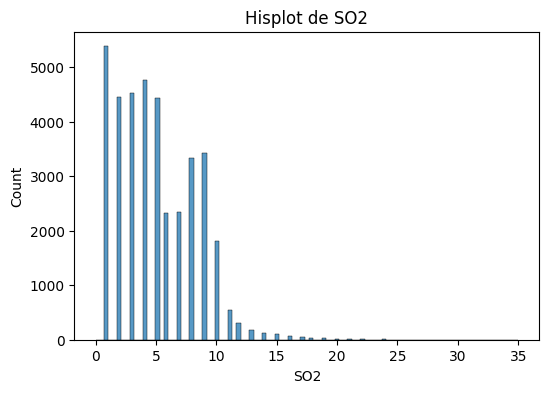

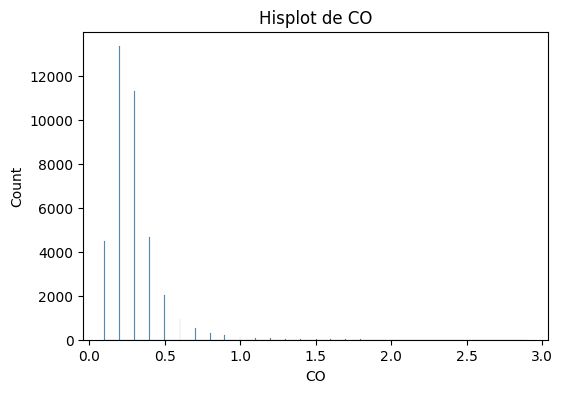

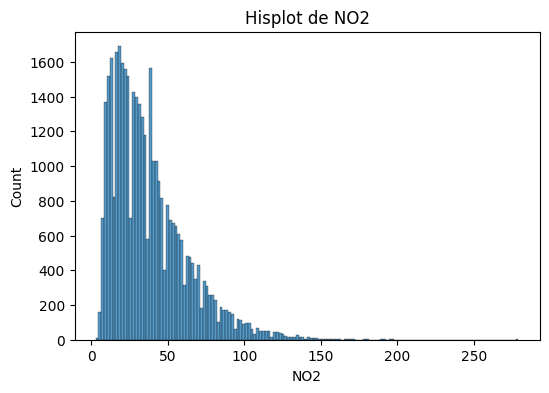

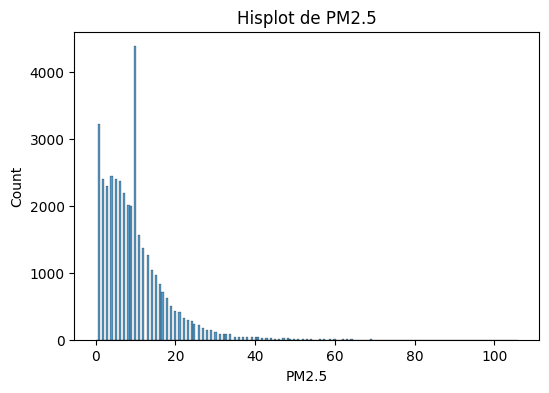

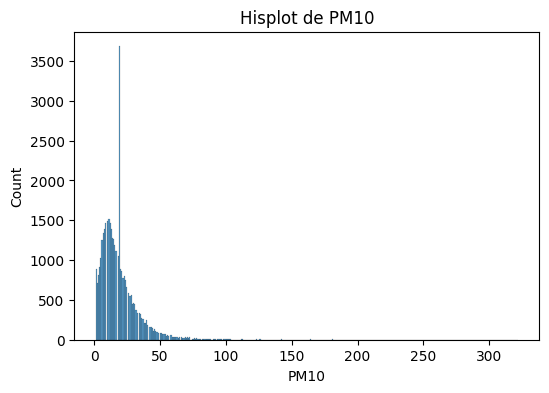

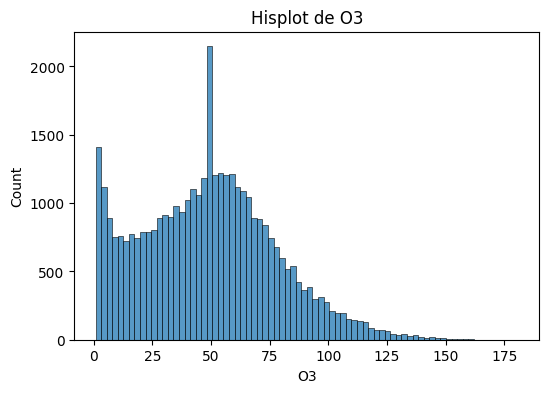

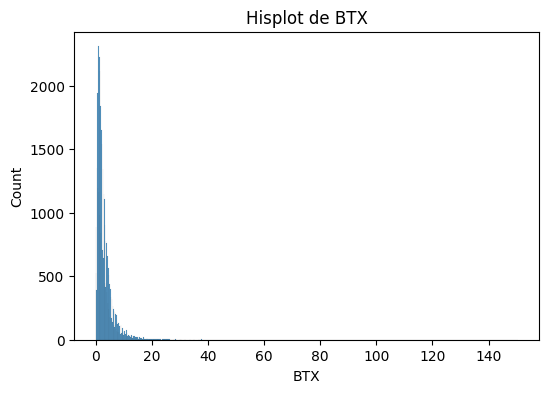

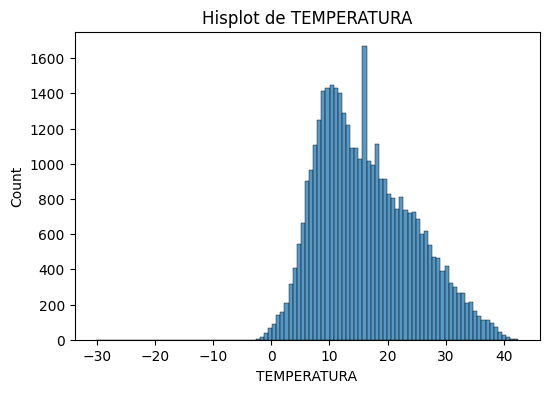

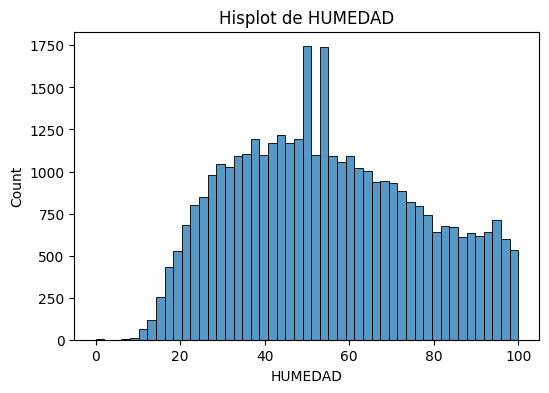

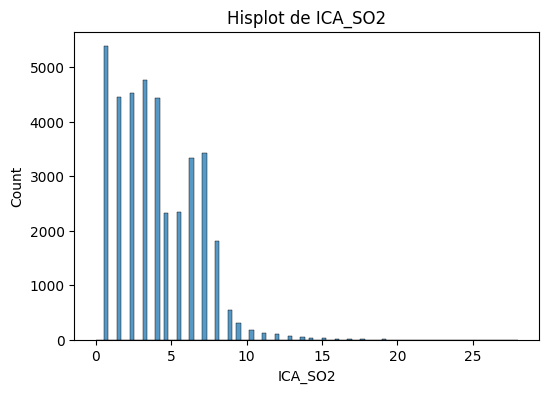

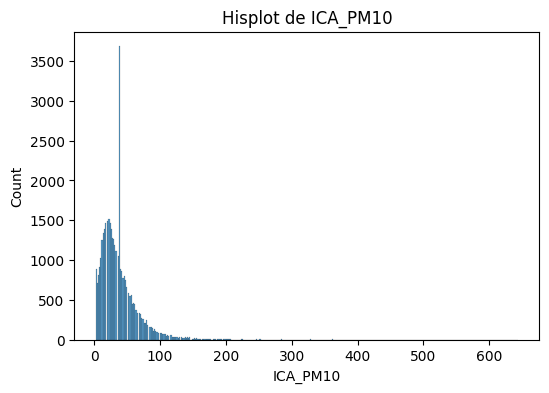

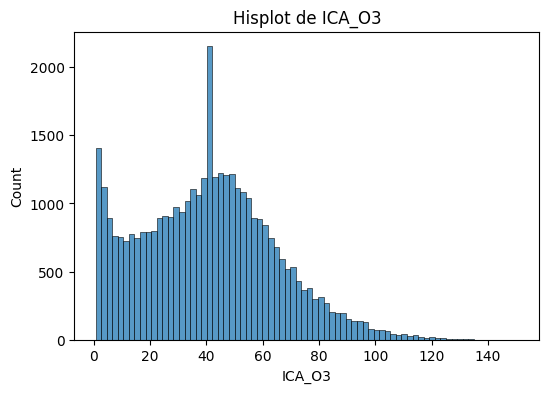

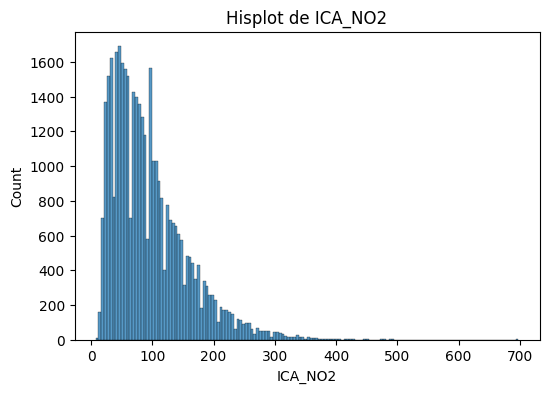

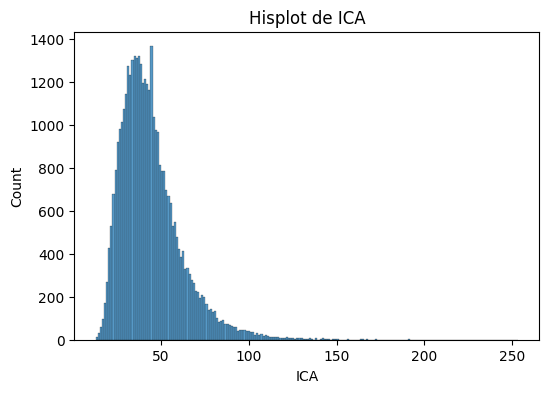

In [12]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f'Hisplot de {column}')
    plt.show()

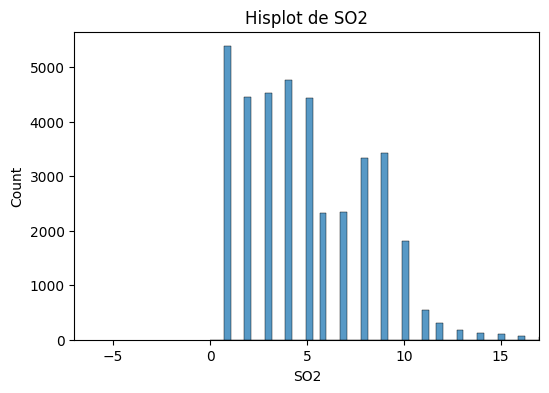

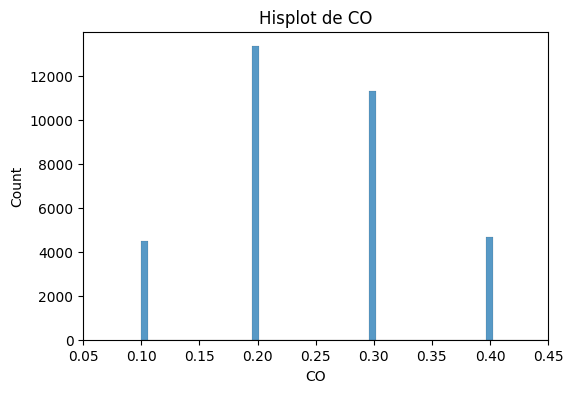

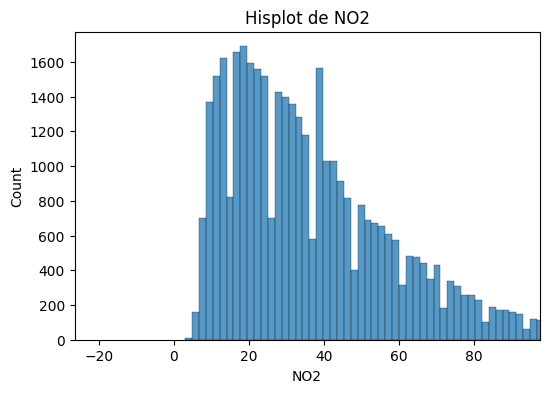

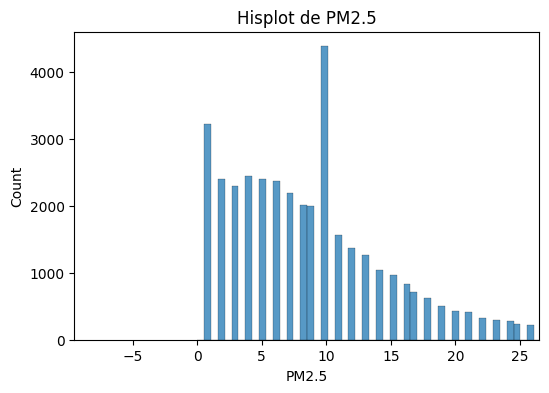

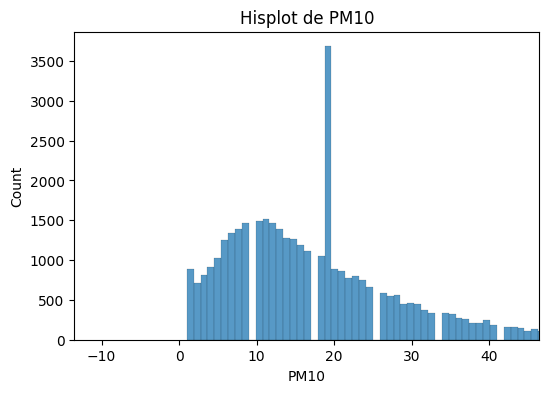

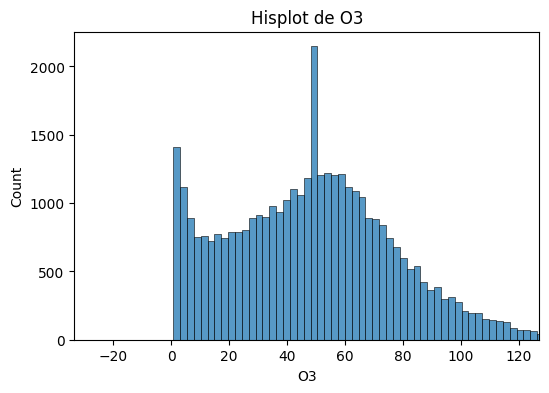

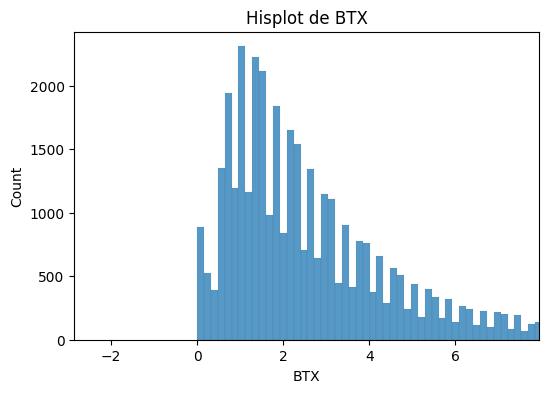

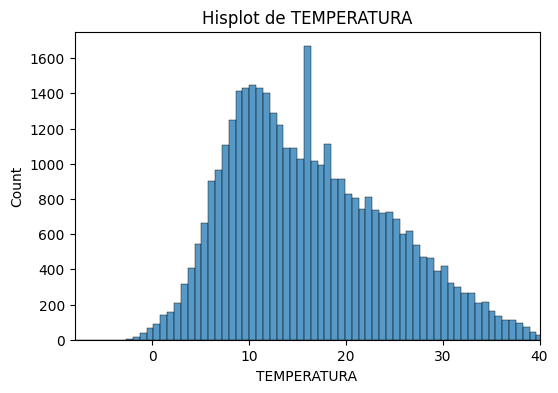

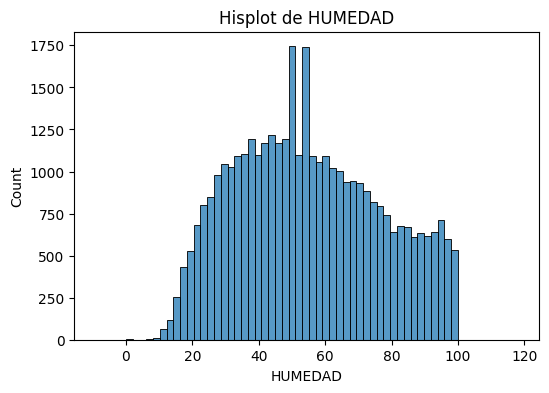

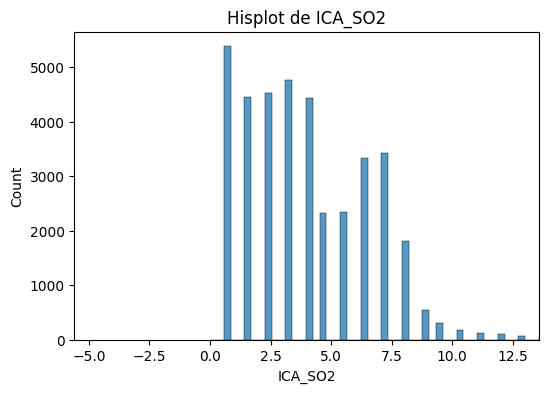

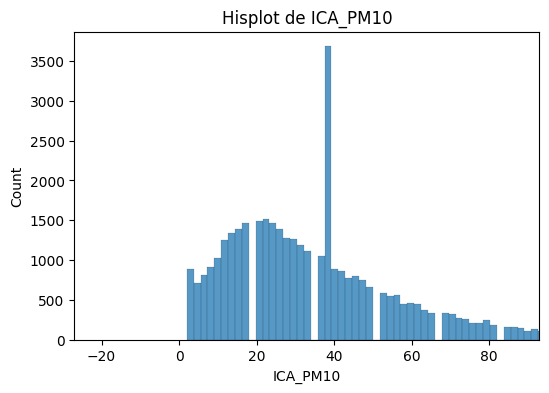

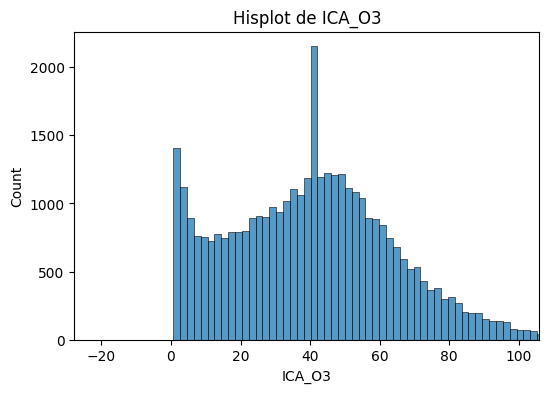

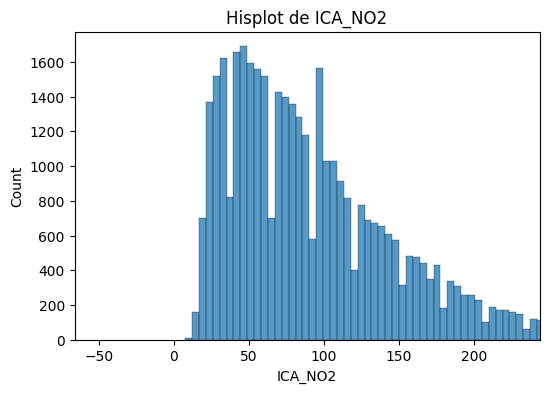

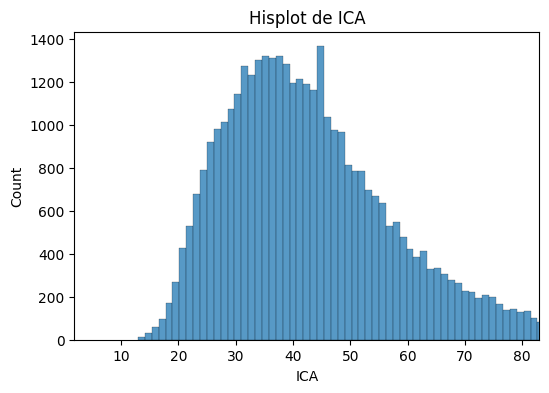

In [13]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=column)
    plt.title(f'Hisplot de {column}')
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    plt.xlim(lower_limit, upper_limit)
    
    plt.show()

## Visualización columnas categóricas

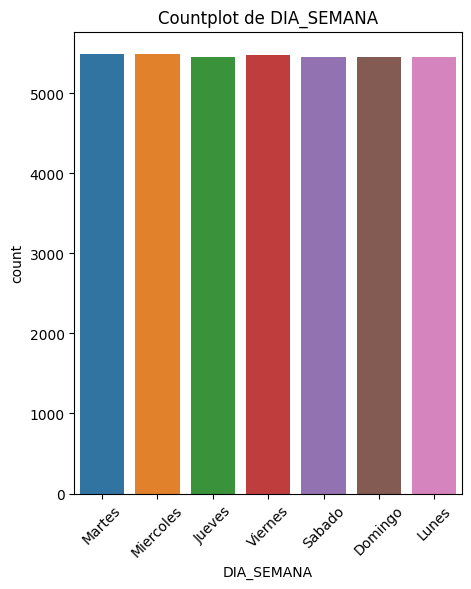

In [14]:
# Columnas categóricas
categorical_columns = df.select_dtypes(include='object').columns.to_list()

for column in categorical_columns:
    if df[column].nunique() < 10:
        plt.figure(figsize=(5,6))
        sns.countplot(data=df, x=column)
        plt.title('Countplot de ' + column)
        plt.xticks(rotation=45)
        plt.show()

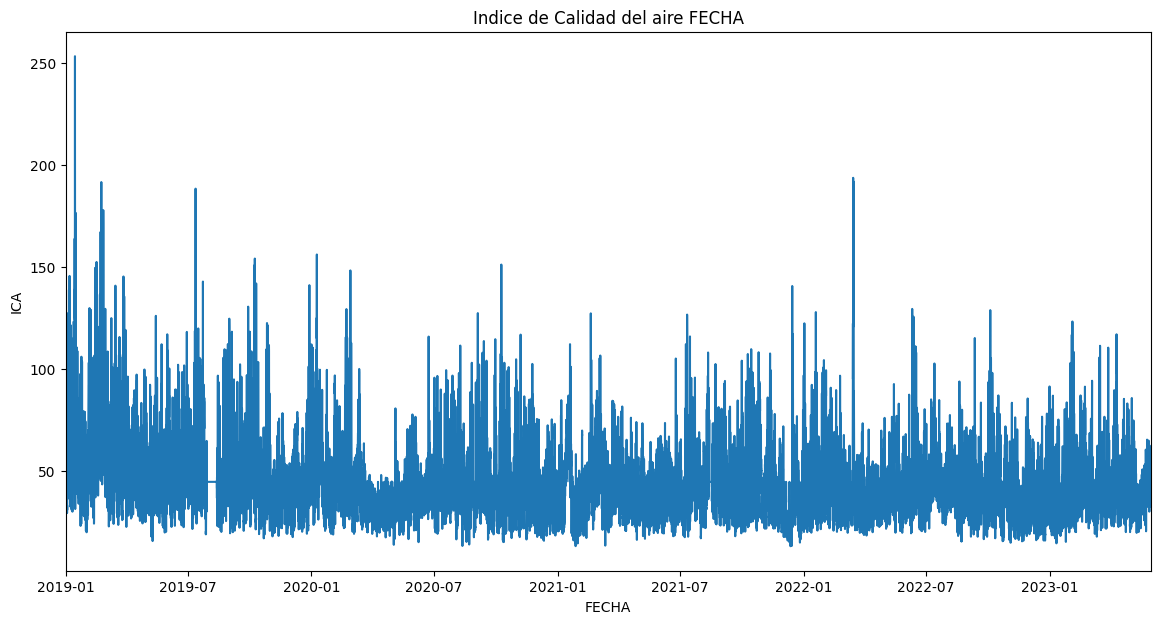

In [15]:
date_columns = df.select_dtypes(include='datetime64').columns.to_list()

for column in date_columns:
    plt.figure(figsize=(14,7))
    
    # necesaria index tipo fecha
    # df.set_index(column, inplace=True)
    # df[column]['2011-01-01':'2012-01-01'].plot()
    
    sns.lineplot(data=df, x=column, y='ICA')
    plt.title('Indice de Calidad del aire ' + column)
    plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2023-05-31'))
    plt.show()

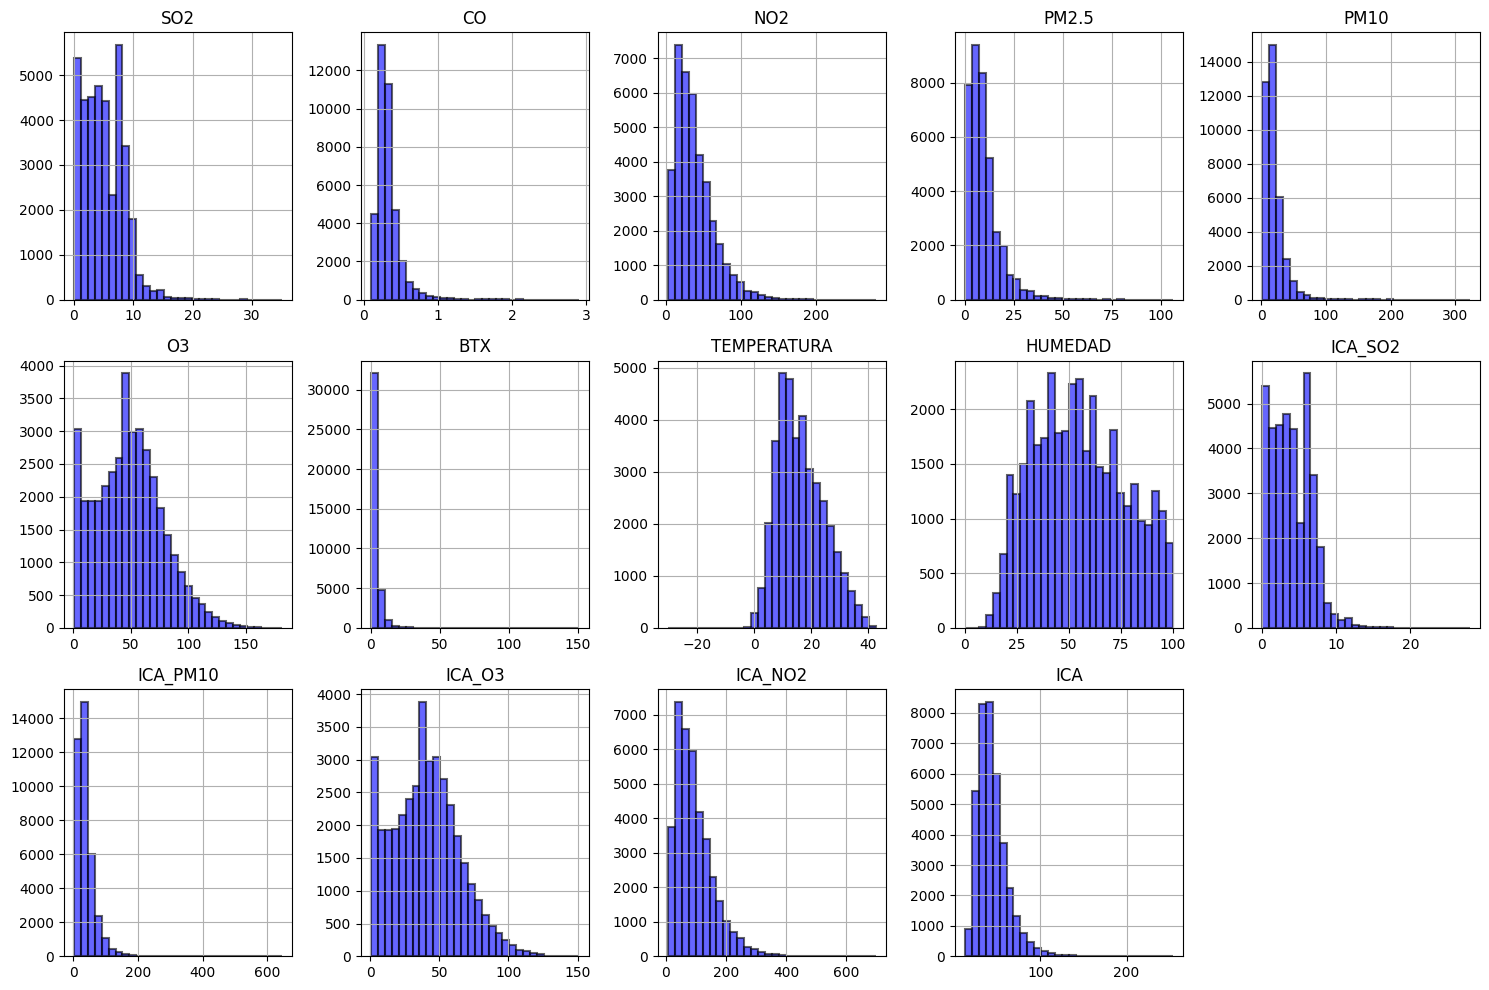

In [16]:
# Seleccionar las columnas para el histograma
columnas_histograma = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA']

# Graficar los histogramas en subplots
df[columnas_histograma].hist(bins=30, alpha=0.6, color='b', edgecolor='k', linewidth=1.5, figsize=(15, 10), layout=(3, 5))

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

# ANÁLISIS BIVARIANTE

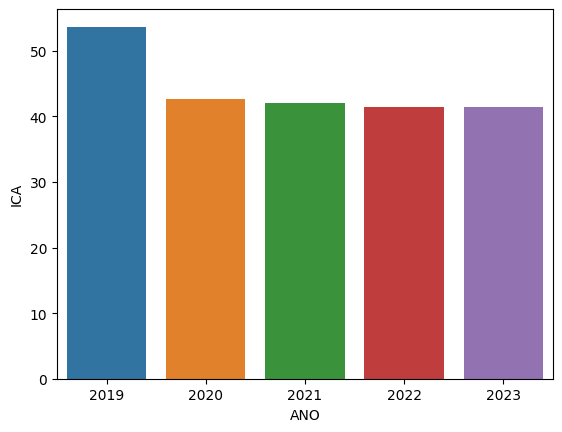

In [17]:
df_ica_ano = df1.groupby('ANO')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='ANO', y='ICA')

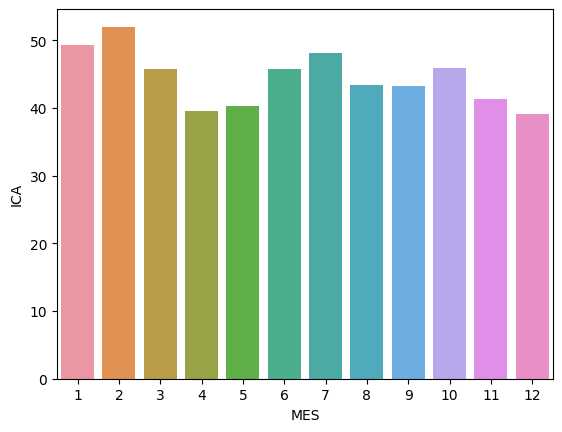

In [18]:
df_ica_ano = df1.groupby('MES')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='MES', y='ICA')

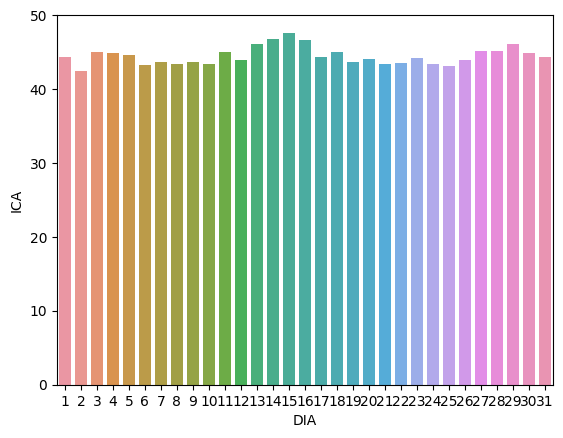

In [19]:
df_ica_ano = df1.groupby('DIA')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='DIA', y='ICA')

In [20]:
# agrupar precio medio por year y month en la misma agrupacion
# Saber trabajar con 2 columnas a la vez
df_year_month = df1.groupby(['ANO','MES'])['ICA'].mean()
df_year_month

# unstack() extrae el índice a una columna creando una TABLA PIVOTANTE por monthç/dia
df_year_month = df_year_month.unstack(level=0)
df_year_month

df_year_month = df_year_month.reset_index().rename_axis(None)
df_year_month

# unpivot: despivotar los valores de las columnas a una fila: convierte de ancho a largo
# id_vars: se duplica para cada valor úni co de año 2016, 2017, 2018
# var_name: nombre de la nueva columna al despivotar los años 2016, 2017, 2018
# value_name: nombre de la nueva columna que  tendrá los valores numéricos que estaban en 2016, 2017, 2018 
df_year_month = df_year_month.melt(var_name='ANO', id_vars='MES', value_name='ICA')
df_year_month

,MES,ANO,ICA
0,1,2019,66.561035
1,2,2019,71.827158
2,3,2019,60.545228
3,4,2019,51.599972
4,5,2019,48.773642
5,6,2019,54.101694
6,7,2019,56.058678
7,8,2019,49.010921
8,9,2019,48.448014
9,10,2019,51.968965


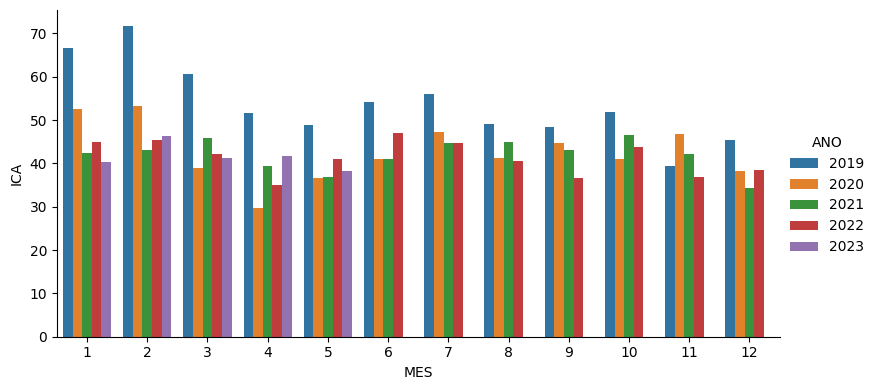

In [21]:
sns.catplot(data=df_year_month, x='MES', y='ICA', hue='ANO', kind='bar',height=4,aspect=2)

In [22]:
df_pivot = df1.pivot_table(index="MES", columns="ANO", values="SO2")
df_pivot.head(12)

ANO,2019,2020,2021,2022,2023
MES,,,,,
1,11.314619,7.368693,2.977243,4.182175,2.526158
2,9.930288,7.145778,2.646520,3.904989,3.024382
3,9.044872,7.282878,3.345016,3.500206,2.296318
4,8.734829,7.307585,3.276281,4.046154,1.228097
5,9.096981,7.962882,3.807485,4.687138,1.283912
6,9.505128,8.489743,4.556410,5.587607,NaN
7,9.979110,10.443031,5.561517,4.119210,NaN
8,4.523951,9.490177,7.441045,1.053039,NaN
9,4.457158,9.221152,4.294230,1.032478,NaN


In [23]:
df_pivot.isnull().sum()

ANO
2019    0
2020    0
2021    0
2022    0
2023    7
dtype: int64

In [24]:
df_pivot[2023.0] = df_pivot[2023.0].fillna(0)

In [25]:
df_pivot.head(12)

ANO,2019,2020,2021,2022,2023
MES,,,,,
1,11.314619,7.368693,2.977243,4.182175,2.526158
2,9.930288,7.145778,2.646520,3.904989,3.024382
3,9.044872,7.282878,3.345016,3.500206,2.296318
4,8.734829,7.307585,3.276281,4.046154,1.228097
5,9.096981,7.962882,3.807485,4.687138,1.283912
6,9.505128,8.489743,4.556410,5.587607,0.000000
7,9.979110,10.443031,5.561517,4.119210,0.000000
8,4.523951,9.490177,7.441045,1.053039,0.000000
9,4.457158,9.221152,4.294230,1.032478,0.000000


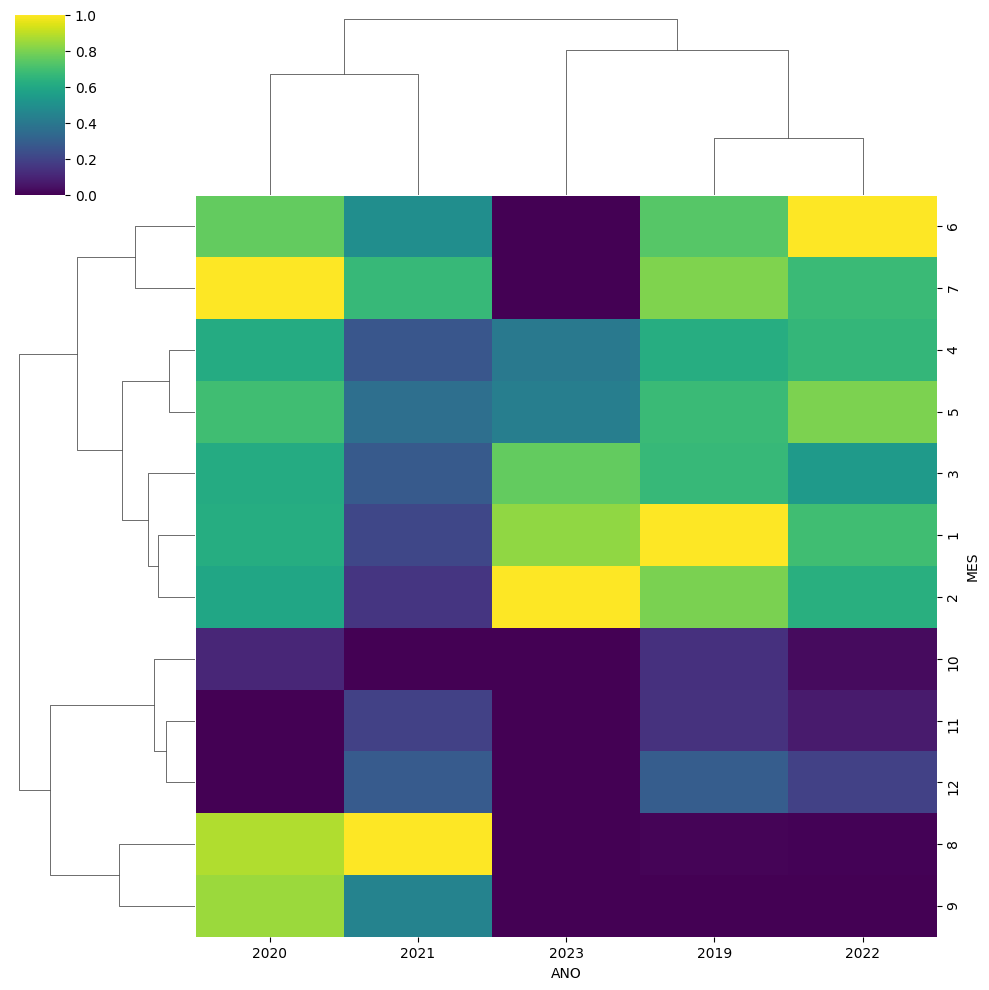

In [26]:
sns.clustermap(df_pivot, cmap="viridis", standard_scale=1)

## ANÁLISIS MULTIVARIANTE

<Axes: >

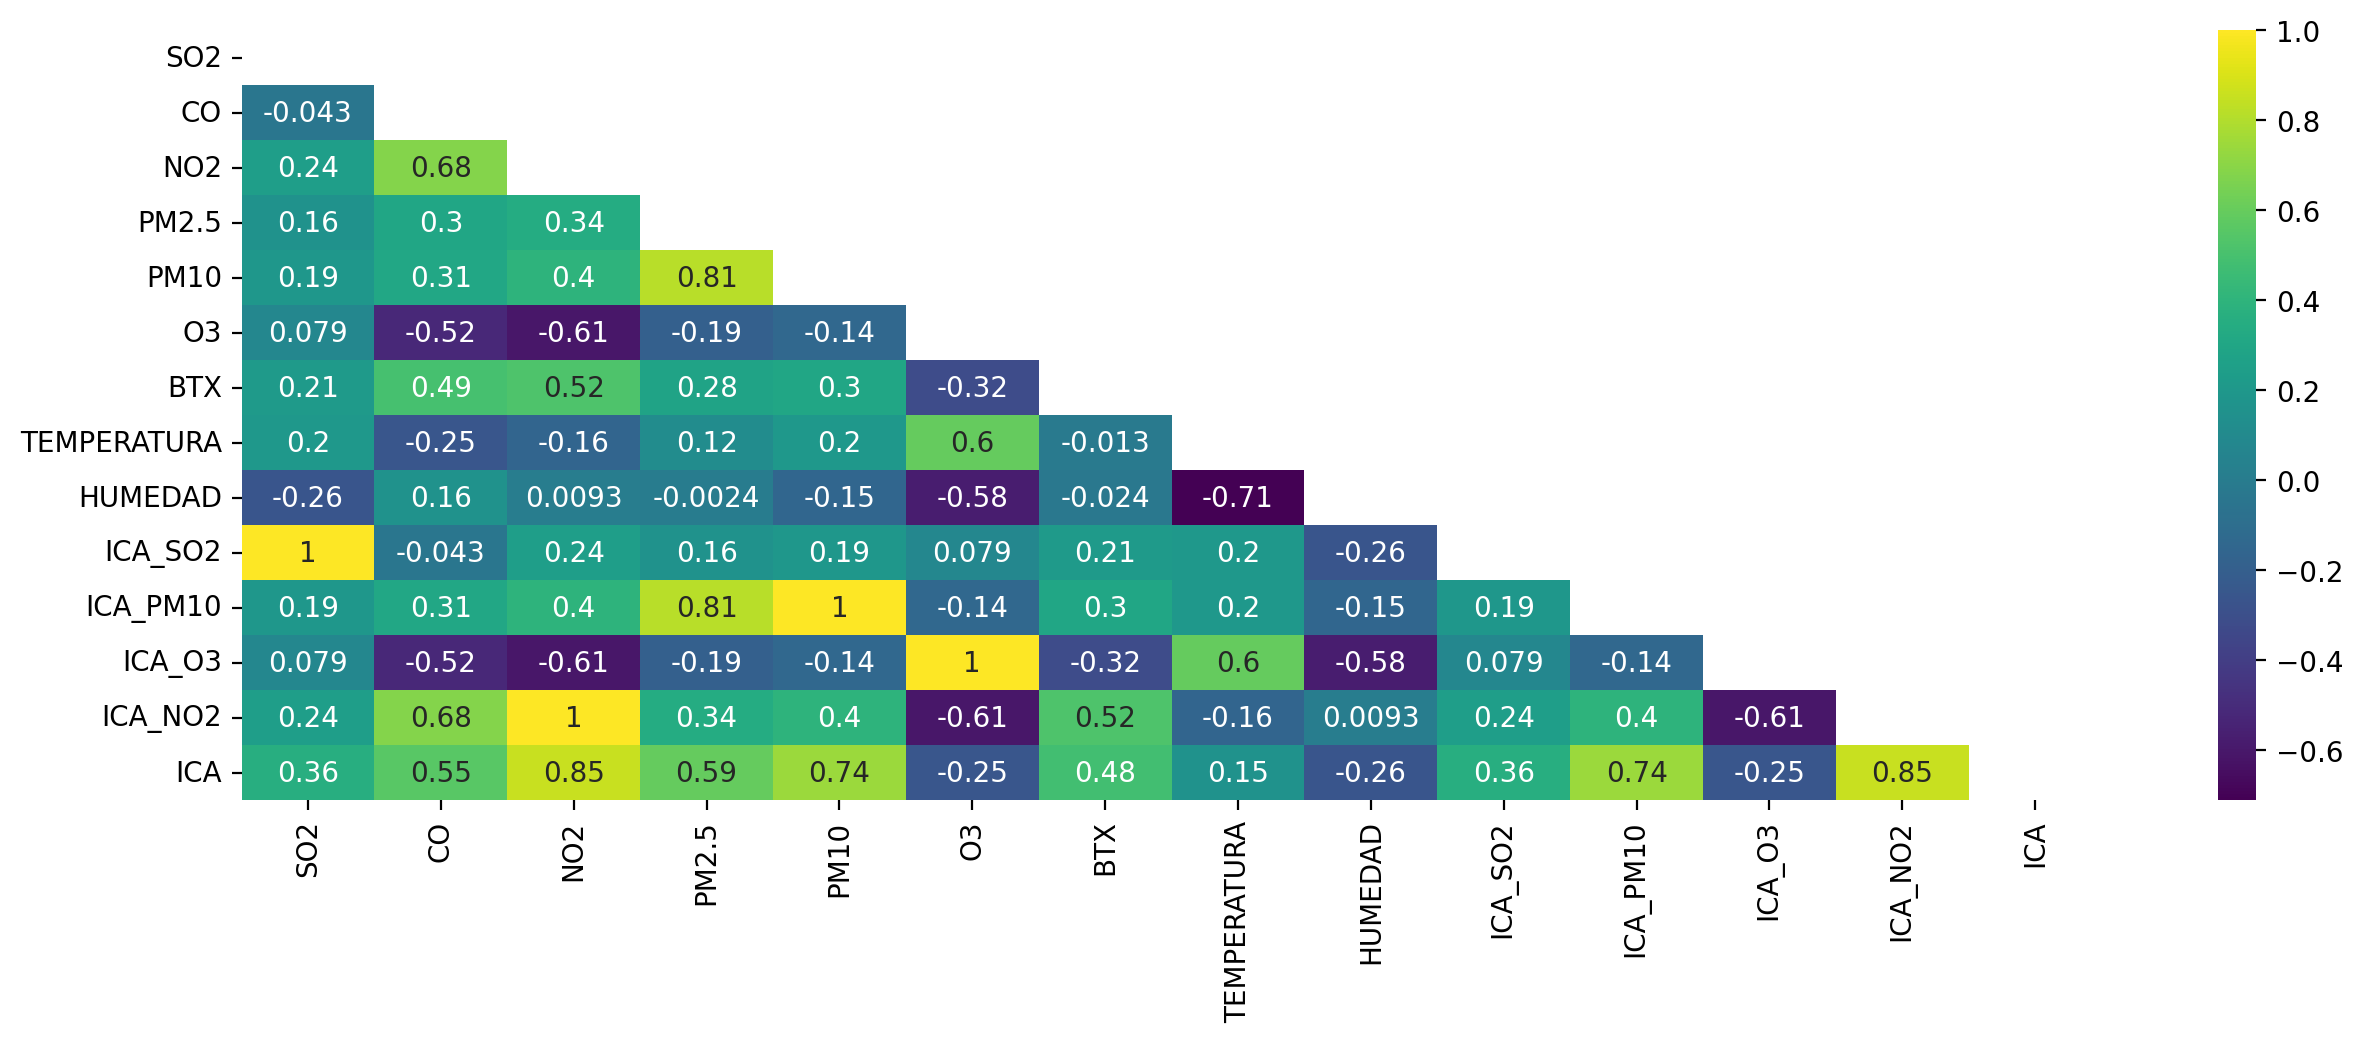

In [27]:
plt.figure(figsize=(15, 5), dpi=200)

df_corr = df.corr(numeric_only=True)
filter = np.triu(df_corr)# np.triu para el triángulo superior
sns.heatmap(df_corr, annot=True, cmap="viridis", mask=filter)

C:\Users\Emma\AppData\Local\Temp\ipykernel_20276\2969663148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr =df.corr() # matriz de correlación


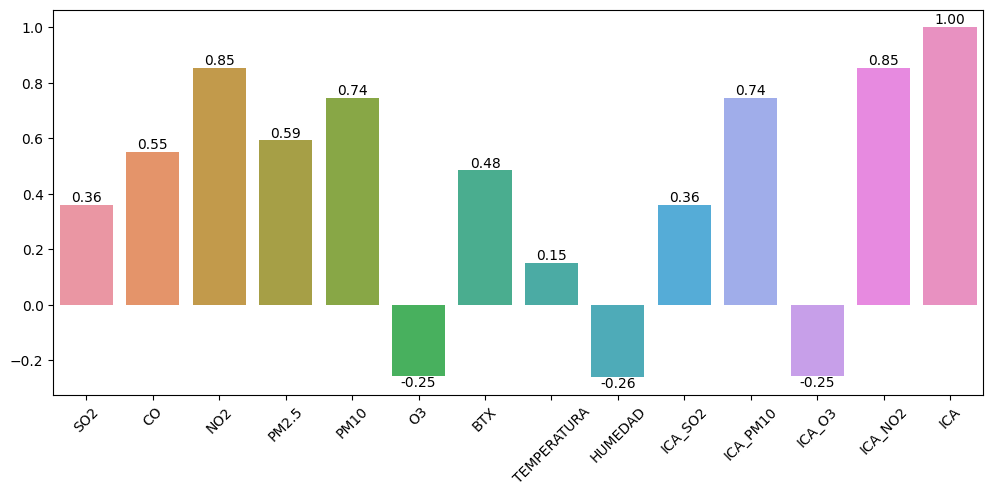

In [28]:
# Correlación con barras
df_corr =df.corr() # matriz de correlación

corr_ICA = df_corr['ICA'] # filtrar correlación precio
filter = (corr_ICA<-0.1) | (corr_ICA>0.1) # filtrar aquellas con baja correlación
corr_price = corr_ICA[filter]
corr_price = corr_price.sort_values(ascending=False)[1:] # ordenar descendente

plt.figure(figsize=(12,5))
ax =sns.barplot(x=corr_ICA.index, y=corr_ICA.values)
plt.xticks(rotation=45)

labels = [f'{value:.2f}' for value in corr_ICA.values] # redondear las correlaciones a dos decimales
#labels =[str(round(value,2)) for value in corr_price.values]
ax.bar_label(ax.containers[0], labels= labels);